In [1]:
import os
os.chdir('..')
os.getcwd()

'/Users/signapoop/Desktop/fyp-graph-clustering'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import pickle 
import numpy as np
import os
from collections import defaultdict

## Plot ALL

In [3]:
overwrite = 1

In [4]:
# Load results
dataset_names = ['cora_test', 'citeseer_test', 'pubmed_test']
labels = ['Cora', 'Citeseer', 'Pubmed']
save_path = 'alphas.pdf'
if overwrite == 1:
    dataset_names = ['cora_test', 'citeseer_test', 'pubmed_test', 'ms_academic']
    labels = ['Cora', 'Citeseer', 'Pubmed', 'MS Academic']
    save_path = 'alphas1.pdf'
elif overwrite == 2:
    dataset_names = ['reddit_full', 'reddit_test']
    labels = ['Reddit Train', 'Reddit Test']
    save_path = 'alphas2.pdf'
    
all_results = {}
for name in dataset_names:
    lookup_file = 'data/{}_results.pkl'.format(name)
    with open(lookup_file, 'rb') as f:
        all_results[name] = pickle.load(f)[0]

In [5]:
best_alpha = {'cora_test': 0.4, 'citeseer_test': 0.4, 'pubmed_test': 0.5,
              'cora_ml': 0.2, 'ms_academic': 0.5, 'reddit_full': 0.5, 'reddit_test': 0.5}

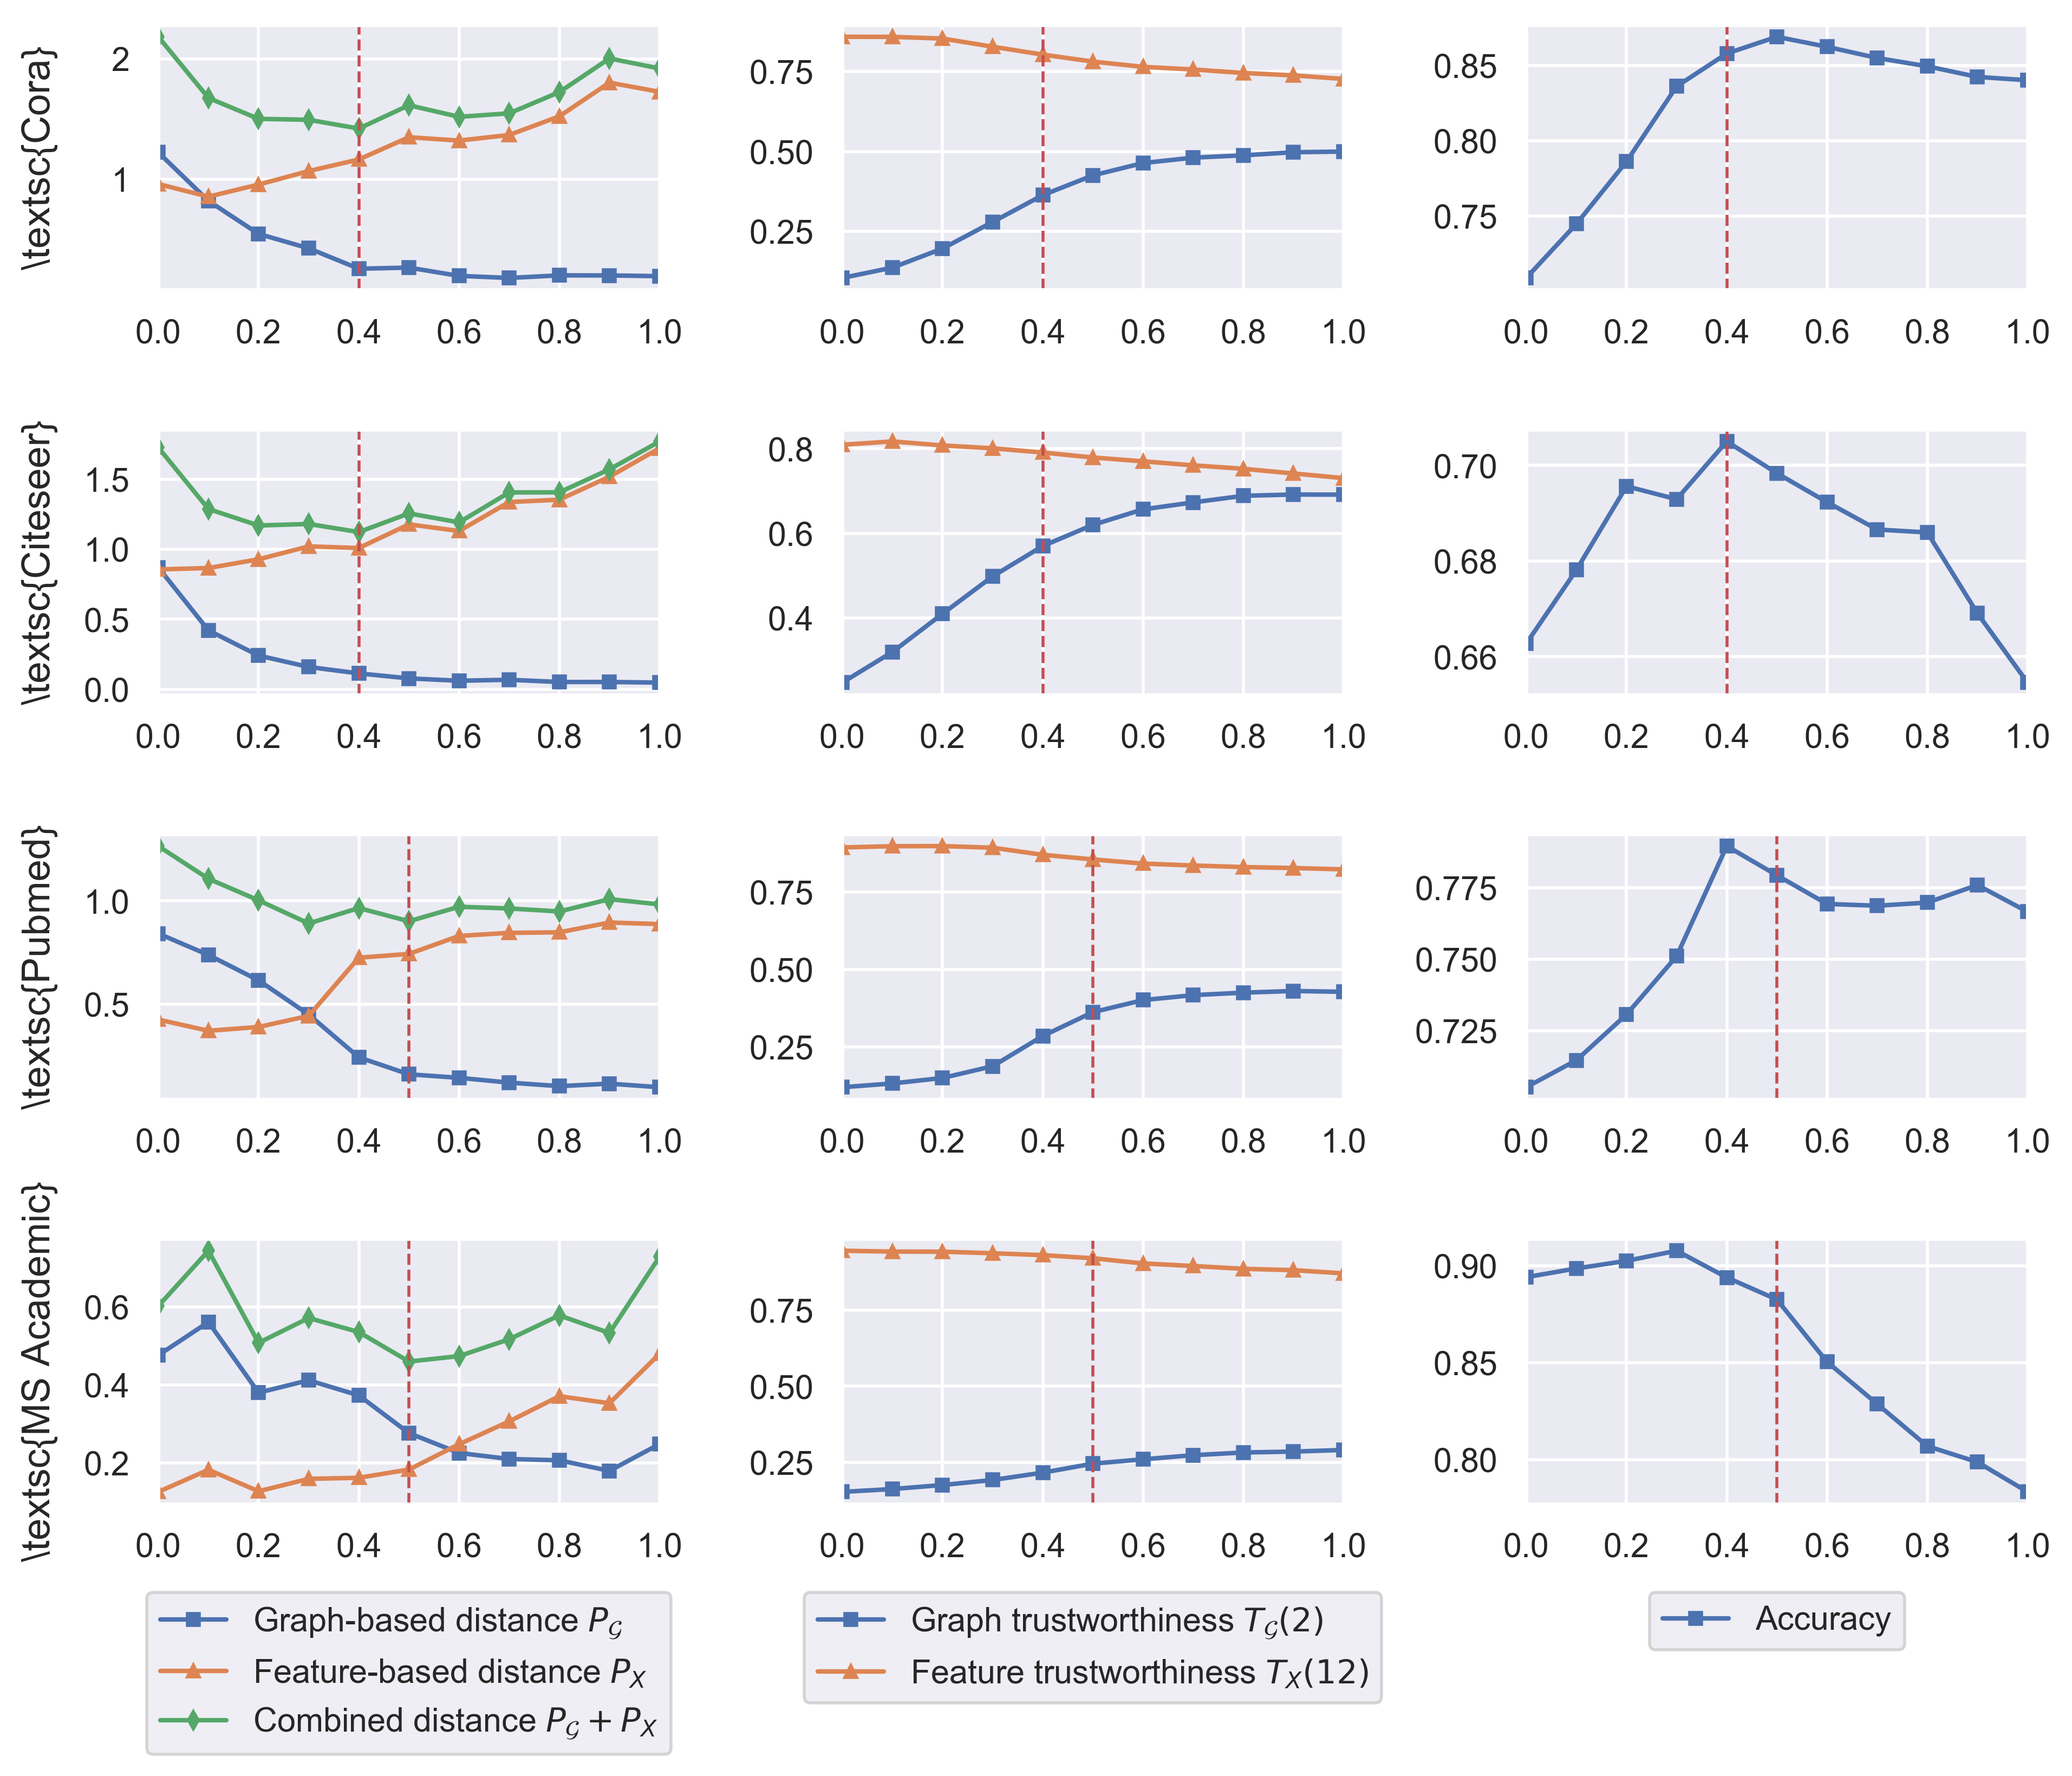

In [7]:
n_rows = len(dataset_names)
left_part = r'\textsc{'
test_range = np.linspace(0, 1, num=11)
legend_size = 11
title_size = 13

import seaborn as sns
sns.set()

import matplotlib as mpl
mpl.rcParams['lines.markersize'] = 4
# mpl.rcParams['axes.titlesize'] = 'large'
csfont = {'fontname':'Arial'}

# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

#f, axarr = plt.subplots(n_rows, 3, figsize=(10, 1.71*n_rows), sharex=False, dpi=400)
f, axarr = plt.subplots(n_rows, 3, figsize=(9.75, 2.1*n_rows), sharex=False, dpi=400)
for i, name in enumerate(dataset_names):
    summary = all_results[name]
    axarr[i,0].plot(test_range, summary['Avg graph distance'], marker='s', label=r'Graph-based distance $P_{\mathcal{G}}$')
    axarr[i,0].plot(test_range, summary['Avg feature distance'], marker='^', label=r'Feature-based distance $P_{X}$')
    axarr[i,0].plot(test_range, summary['Total distance'], marker='d', label='Combined distance $P_{\mathcal{G}} + P_{X}$')

    if i == n_rows-1:
        #axarr[i,0].set_xlabel('alpha')
        axarr[i,0].legend(loc='upper center', prop={'size': legend_size}, bbox_to_anchor=(0.5, -0.27), ncol=1)
    axarr[i,0].set_xlim(0,1)
    axarr[i,0].set_ylabel(left_part + labels[i] + '}', fontsize=title_size)
    axarr[i,0].yaxis.set_label_coords(-0.2,0.5)
    axarr[i,0].axvline(best_alpha[name], lw=1, color='r', linestyle="--")
    #axarr[i,0].grid()
    #axarr[i,0].get_yaxis().set_visible(False)

    axarr[i,1].plot(test_range, summary['Graph trustworthiness'], marker='s', label=r'Graph trustworthiness $T_{\mathcal{G}}(2)$')
    axarr[i,1].plot(test_range, summary['Feature trustworthiness'], marker='^', label=r'Feature trustworthiness $T_{X}(12)$')

    if i == n_rows-1:
        #axarr[i,1].set_xlabel('alpha')
        axarr[i,1].legend(loc='upper center', prop={'size': legend_size}, bbox_to_anchor=(0.5, -0.27), ncol=1)
    axarr[i,1].set_xlim(0,1)
    axarr[i,1].axvline(best_alpha[name], lw=1, color='r', linestyle="--")
    #axarr[i,1].grid()
    #axarr[i,1].get_yaxis().set_visible(False)

    axarr[i,2].plot(test_range, summary['One NN accuracy'], marker='s', label='Accuracy')
    if i == n_rows-1:
        #axarr[i,2].set_xlabel('alpha')
        axarr[i,2].legend(loc='upper center', prop={'size': legend_size}, bbox_to_anchor=(0.5, -0.27), ncol=1)
    axarr[i,2].set_xlim(0,1)
    axarr[i,2].axvline(best_alpha[name], lw=1, color='r', linestyle="--")
    #axarr[i,2].grid()
    #axarr[i,2].get_yaxis().set_visible(False)

plt.tight_layout()
plt.savefig(save_path, format='pdf', dpi=1000, bbox_inches="tight")

In [ ]:
for i, name in enumerate(dataset_names):
    summary = all_results[name]
    print(summary['Total distance'])
    print(min(summary['Total distance']))
    print(np.argmin(summary['Total distance']))